Импортируются необходимые библиотеки: cv2 для работы с изображениями, numpy для работы с массивами и matplotlib.pyplot для отображения изображений.

Загружаются два изображения с помощью cv2.imread().

Изображения преобразуются в градации серого с помощью cv2.cvtColor(), чтобы упростить дальнейшую обработку

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображений
img1 = cv2.imread('cat1.jpg')
img2 = cv2.imread('cat2.jpg')

# Преобразование изображений в градации серого
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


Определяется функция extract_features, которая находит ключевые точки и дескрипторы для изображения.

Аргументы функции:

image: изображение в градациях серого.

detector: метод детектирования ключевых точек, может быть 'sift' или 'orb'. По умолчанию используется 'sift'.

В зависимости от значения аргумента detector, создается объект детектора SIFT или ORB.

С помощью метода detectAndCompute извлекаются ключевые точки (kp) и дескрипторы (des)

In [2]:
def extract_features(image, detector='sift'):
    """
    Находит ключевые точки и дескрипторы для изображения

    Аргументы:
    image -- изображение в градациях серого
    detector -- 'sift' или 'orb'. По умолчанию 'sift'

    Возвращает:
    kp -- список извлеченных ключевых точек (особенностей) на изображении
    des -- список дескрипторов ключевых точек на изображении
    """
    if detector == 'sift':
        det = cv2.SIFT_create()
    elif detector == 'orb':
        det = cv2.ORB_create()
        
    kp, des = det.detectAndCompute(image, None)
    
    return kp, des


Извлекаются ключевые точки и дескрипторы для обоих изображений с помощью методов SIFT и ORB.

Результаты сохраняются в переменные kp1_sift, des1_sift, kp2_sift, des2_sift для SIFT и kp1_orb, des1_orb, kp2_orb, des2_orb для ORB

In [3]:
# Извлечение ключевых точек и дескрипторов с помощью SIFT
kp1_sift, des1_sift = extract_features(gray1, 'sift')
kp2_sift, des2_sift = extract_features(gray2, 'sift')

# Извлечение ключевых точек и дескрипторов с помощью ORB
kp1_orb, des1_orb = extract_features(gray1, 'orb')
kp2_orb, des2_orb = extract_features(gray2, 'orb')


Определяется функция draw_keypoints, которая отображает ключевые точки на изображении.

Аргументы функции:

image: исходное изображение.

keypoints: список ключевых точек.

title: заголовок для отображаемого изображения.

С помощью cv2.drawKeypoints ключевые точки рисуются на изображении.

Изображение с ключевыми точками отображается с помощью matplotlib

In [4]:
def draw_keypoints(image, keypoints, title):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.show()


Отображаются ключевые точки для каждого метода (SIFT и ORB) на обоих изображениях с помощью функции draw_keypoints

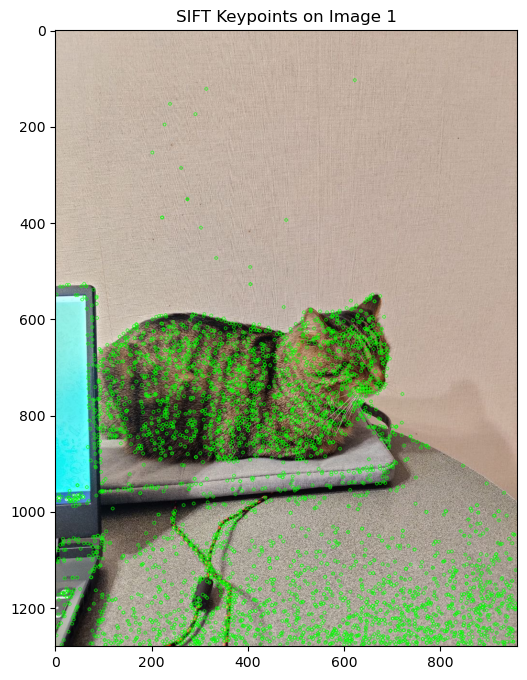

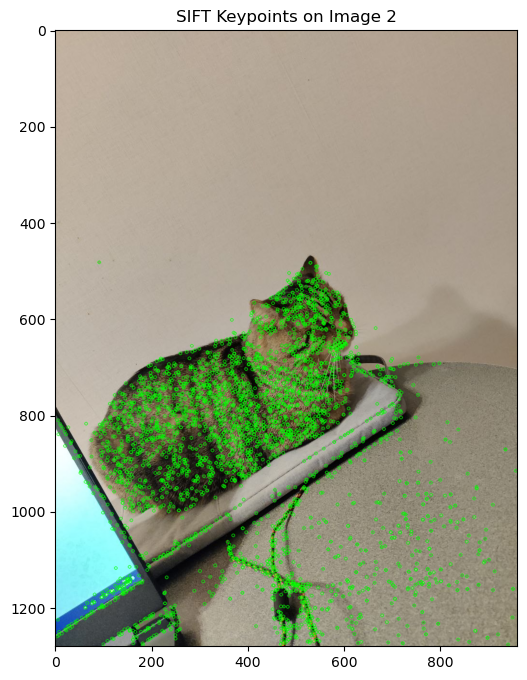

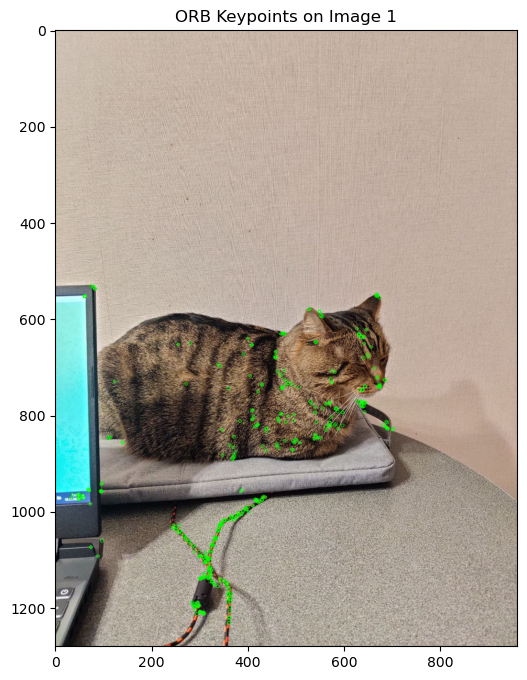

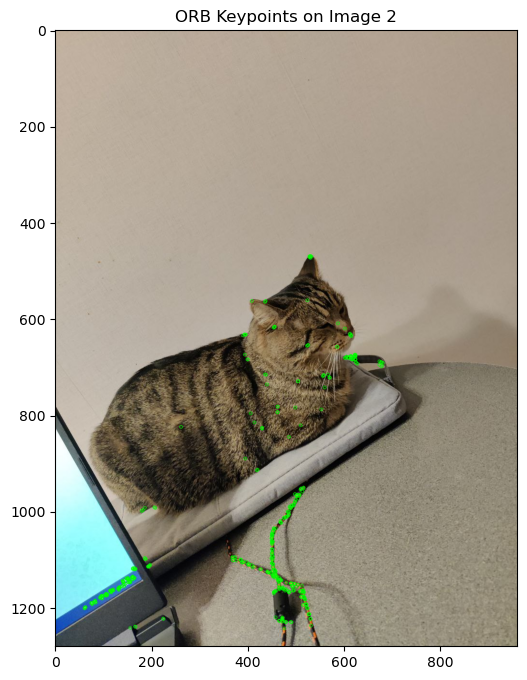

In [5]:
# Отображение ключевых точек для каждого метода
draw_keypoints(img1, kp1_sift, 'SIFT Keypoints on Image 1')
draw_keypoints(img2, kp2_sift, 'SIFT Keypoints on Image 2')

draw_keypoints(img1, kp1_orb, 'ORB Keypoints on Image 1')
draw_keypoints(img2, kp2_orb, 'ORB Keypoints on Image 2')


Выводится количество ключевых точек, найденных каждым методом (SIFT и ORB) на обоих изображениях

In [6]:
# Сравнение количества ключевых точек, найденных каждым методом
print(f"SIFT: {len(kp1_sift)} keypoints on Image 1, {len(kp2_sift)} keypoints on Image 2")
print(f"ORB: {len(kp1_orb)} keypoints on Image 1, {len(kp2_orb)} keypoints on Image 2")


SIFT: 4194 keypoints on Image 1, 3505 keypoints on Image 2
ORB: 500 keypoints on Image 1, 500 keypoints on Image 2


Определяются реальные координаты точек на обоих изображениях.

Вычисляется матрица аффинного преобразования с использованием метода наименьших квадратов с помощью cv2.estimateAffine2D.

Матрица аффинного преобразования разлагается на компоненты с помощью сингулярного разложения (np.linalg.svd).

Вычисляются угол поворота, вектор переноса и скалирование.

Вычисляется обратная матрица аффинного преобразования с помощью cv2.invertAffineTransform.

Применяется обратное преобразование к исходным точкам для проверки

In [7]:
# Реальные координаты точек на изображениях
pts1 = np.float32([[528, 579], [668, 551], [676, 732], [865, 912], [696, 918], [299, 1194]])
pts2 = np.float32([[76, 534], [308, 1159], [234, 690], [529, 579], [668, 551], [678, 735]])

# Вычисление матрицы афинного преобразования с использованием метода наименьших квадратов
M, _ = cv2.estimateAffine2D(pts1, pts2)
print("Матрица афинного преобразования:\n", M)

# Разложение матрицы на компоненты
U, S, Vt = np.linalg.svd(M[:2, :2])

# Угол поворота
theta = np.arctan2(U[1, 0], U[0, 0])
print("Угол поворота (в радианах):", theta)

# Вектор переноса
translation = M[:, 2]
print("Вектор переноса:", translation)

# Скалирование
scale = S
print("Скалирование:", scale)

# Вычисление обратной матрицы афинного преобразования
M_inv = cv2.invertAffineTransform(M)
print("Обратная матрица афинного преобразования:\n", M_inv)

# Применение обратного преобразования к исходным точкам для проверки
pts1_transformed = cv2.transform(np.array([pts2]), M_inv)
print("Преобразованные точки:\n", pts1_transformed)


Матрица афинного преобразования:
 [[-7.36832097e-01  2.41256259e+00 -1.03389732e+03]
 [ 1.38619509e-01 -7.62217152e-01  1.15423617e+03]]
Угол поворота (в радианах): 2.8451997791792443
Вектор переноса: [-1033.89731888  1154.23616657]
Скалирование: [2.63745133 0.08614294]
Обратная матрица афинного преобразования:
 [[-3.35486121e+00 -1.06187753e+01  8.78799247e+03]
 [-6.10126935e-01 -3.24313014e+00  3.11252950e+03]]
Преобразованные точки:
 [[[ 2862.5967   1334.3284 ]
  [-4552.466    -834.1775 ]
  [  675.9995    732.     ]
  [  864.9995    912.     ]
  [  695.9995    918.     ]
  [-1291.4033    315.16284]]]


Определяется функция draw_matches, которая создает изображение, объединяющее два исходных изображения, и рисует линии, соединяющие соответствующие точки.

Создание изображения для отображения:

h1, w1 = img1.shape[:2] и h2, w2 = img2.shape[:2]: Получаем высоту и ширину обоих изображений.

img_combined = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8): Создаем пустое изображение, которое будет содержать оба исходных изображения. Высота нового изображения равна максимальной высоте из двух исходных изображений, а ширина равна сумме ширин двух изображений.

img_combined[:h1, :w1, :] = img1 и img_combined[:h2, w1:w1 + w2, :] = img2: Копируем оба изображения в новое изображение. Первое изображение размещается слева, а второе - справа

Рисование линий, соединяющих соответствующие точки:

for pt1, pt2 in zip(pts1, pts2): Проходим по всем парам точек из списков pts1 и pts2.

pt2_shifted = (int(pt2[0] + w1), int(pt2[1])): Смещаем координаты точек из второго изображения на ширину первого изображения, чтобы они правильно отображались на новом изображении.

cv2.line(img_combined, (int(pt1[0]), int(pt1[1])), pt2_shifted, (0, 255, 0), 2): Рисуем линию, соединяющую соответствующие точки из первого и второго изображений. Линия рисуется зеленым цветом (0, 255, 0) и имеет толщину 2 пикселя.

cv2.circle(img_combined, (int(pt1[0]), int(pt1[1])), 5, (0, 0, 255), -1) и cv2.circle(img_combined, pt2_shifted, 5, (0, 0, 255), -1): Рисуем круги на соответствующих точках из первого и второго изображений. Круги рисуются красным цветом (0, 0, 255) и имеют радиус 5 пикселей.

Возвращение результирующего изображения:

return img_combined: Возвращаем новое изображение, содержащее оба исходных изображения и линии, соединяющие соответствующие точки

In [8]:
def draw_matches(img1, img2, pts1, pts2):
    # Создаем изображение для отображения
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    img_combined = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    img_combined[:h1, :w1, :] = img1
    img_combined[:h2, w1:w1 + w2, :] = img2

    # Рисуем линии, соединяющие соответствующие точки
    for pt1, pt2 in zip(pts1, pts2):
        pt2_shifted = (int(pt2[0] + w1), int(pt2[1]))
        cv2.line(img_combined, (int(pt1[0]), int(pt1[1])), pt2_shifted, (0, 255, 0), 2)
        cv2.circle(img_combined, (int(pt1[0]), int(pt1[1])), 5, (0, 0, 255), -1)
        cv2.circle(img_combined, pt2_shifted, 5, (0, 0, 255), -1)

    return img_combined


Реальные координаты точек на изображениях:

pts1 и pts2: Определяются координаты точек на обоих изображениях.

Создание изображения с соединенными точками:

img_matches = draw_matches(img1, img2, pts1, pts2): Вызываем функцию draw_matches, чтобы создать изображение, содержащее оба исходных изображения и линии, соединяющие соответствующие точки.

Отображение изображения:

plt.figure(figsize=(16, 8)): Создаем фигуру для отображения изображения с размером 16x8

plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)): Отображаем изображение с помощью matplotlib. Поскольку OpenCV использует цветовую модель BGR, а matplotlib - RGB, мы преобразуем изображение из BGR в RGB с помощью cv2.cvtColor.

plt.show(): Показываем изображение

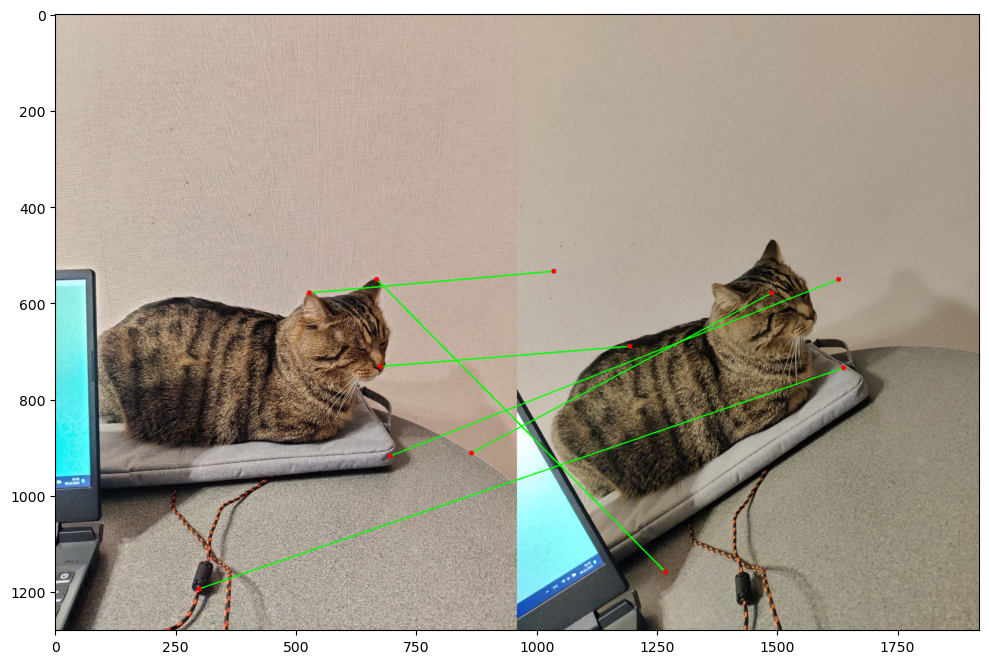

In [9]:
# Реальные координаты точек на изображениях
pts1 = np.float32([[528, 579], [668, 551], [676, 732], [865, 912], [696, 918], [299, 1194]])
pts2 = np.float32([[76, 534], [308, 1159], [234, 690], [529, 579], [668, 551], [678, 735]])

# Отображение изображений с соединенными точками
img_matches = draw_matches(img1, img2, pts1, pts2)
plt.figure(figsize=(16, 8))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
[[-7.36832097e-01  2.41256259e+00 -1.03389732e+03]
 [ 1.38619509e-01 -7.62217152e-01  1.15423617e+03]]


Эта матрица описывает преобразование, которое включает в себя масштабирование, поворот и перенос

Угол поворота (в радианах): 2.8451997791792443

Это значение указывает на угол поворота, который составляет примерно 163 градуса (2.8451997791792443 радиан). Что не является правильным

Вектор переноса: [-1033.89731888 1154.23616657]

Этот вектор указывает на смещение изображения по осям X и Y. Изображение смещается на -1033.9 пикселей по оси X и на 1154.2 пикселей по оси Y

Скалирование: [2.63745133 0.08614294]

Эти значения указывают на коэффициенты масштабирования по осям X и Y. Изображение масштабируется в 2.64 раза по оси X и в 0.086 раза по оси Y. Коэффициенты масштабирования показывают, что изображение сильно растянуто по оси X и сильно сжато по оси Y. Совсем не соответсвует действительности

In [ ]:
[[-3.35486121e+00 -1.06187753e+01  8.78799247e+03]
 [-6.10126935e-01 -3.24313014e+00  3.11252950e+03]]

Эта матрица описывает обратное преобразование, которое возвращает изображение в исходное состояние

In [ ]:
[[[ 2862.5967   1334.3284 ]
  [-4552.466    -834.1775 ]
  [  675.9995    732.     ]
  [  864.9995    912.     ]
  [  695.9995    918.     ]
  [-1291.4033    315.16284]]]


Эти точки представляют собой координаты точек после применения обратного аффинного преобразования